In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from random import randint
from PIL import Image, ImageFilter

import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.models import load_model

import cv2

In [6]:
best_network = load_model("best_network.h5")

Load in the images, use the model to predict and then print out what the label for that image is along with the prediction for that image. From looking at the results of these images the model got 1 wrong and 5 right. So it was correct 80% of the time. Not too bad. Let's take a further look at the images and predictions in the next cell. 

In [7]:
classes = ["cowboy", "flatcap", "ushanka"]
for c in classes:
  files = [os.path.join("examples", x) for x in os.listdir("examples") if c in x]
  imgs = [load_img(img_path, target_size=(331, 331)) for img_path in files]
  for img in imgs:
    img_tensor = np.array([img_to_array(img)])
    img_tensor /= 255
    print("Should be {}, predicted as {}".format(c, classes[np.argmax(best_network.predict(img_tensor)[0], axis=-1)]))


Should be cowboy, predicted as cowboy
Should be cowboy, predicted as flatcap
Should be flatcap, predicted as flatcap
Should be flatcap, predicted as flatcap
Should be ushanka, predicted as ushanka
Should be ushanka, predicted as ushanka


<b> I had this typed up when I was happy with version 2 of the classifier but version 3 fixed this. I said I would leave it in.</b> Version 3 of the classifer preficted all the old images correctly so I went looking for harder images.<br>
<strike>
The first image is of Indiana Jones wearing a his cowboy hat, but the model says he's wearing a Ushanka. These are two completly different styles of hats, why does the model think that Indiana is wearing a Ushanka? Does the model have a sense of humor and decided to wind up both the Russians and the Americans by mixing an american "hero" with a symbol used to represent Russian headwear, in an attempt to restart the cold war? <br>
Well no.. this mess-up of classification happs when anyone is wearing a flatcap or cowboy hat. The issue is when the data was being split, the ushanka training dataset had a few images of people wearing ushankas. Both the flatcap and cowboy training datasets did not. I think that when the model was being trained it recconised that and if the hat was not surrounded by nothing, ie someone wearing that hat, it would be a ushanka. This means when ever someone is wearing a hat, the model sees a person/ maniqin and predicts a ushanka. How would I fix this in future?


1.   Ensure that there is an even amount of images of hats on their own and people wearing hats.
2.   Ensure this data split evenly so that 50% of the images in the training set for each class, are just the hat by themselves and the other 50% are people wearing that style of hat.
3.   Ensure a a wider range of the types of photos for each class. Get some photos of just the hat by itself, some of it on a person, some of it on a maniqin and finaly some of it on a different backgrounds. 
</strike>


We can see that the issue with Indiana wearing the cowboy hat is fixed with version three of the classifier. <br>
I found three images online that I thought the classifier would struggle with, the first was the dog wearing a red cowboy hat. The second was the flatcap with ushanka ears and the final one was a dog wearing a ushanka. <br>The classifier miss predicted the dog wearing a red cowboy hat. I expected this to be the case as no where in the image dataset was there any photo remotely similar to this. It would be unfair to expect the classifier to identify the cowboy hat in this image. If I was to try and solve this issue, when collecting the images I would include more random images, like ducks with cowboy hats. I guess it would depend on the domain that this classifier would be used, if it was for a pet hat website then it would be usless because some sheepdog in south Kerry would be running around with a cowboy hat instead of a flatcap. If this was the case then I would have gathered much more photos of pets wearing hats. <br><br>
The second image I thought it would miss classify is the flatcap with ears. I thought if it was looking for the ears of a ushanka it might think that this was a ushanka. This shows me that it must be looking at maybe the material or shape of the hat to classify it. <br><br>
The final image was the dog wearing a Ushanka, I though the classifer might struggle with this becase there is no photos in the dataset of animals wearing hats. Also there is a lot of background noise in this photo such as the flag, boot and door. I am happy that it classifed this correctly because there was lots of other patterns within the photo that the classifier could have picked up.

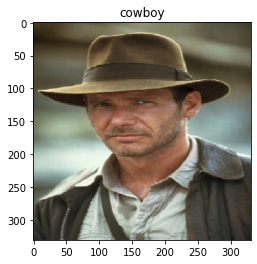

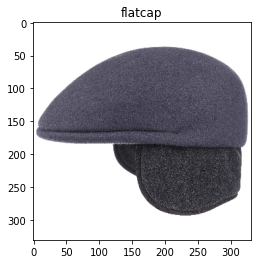

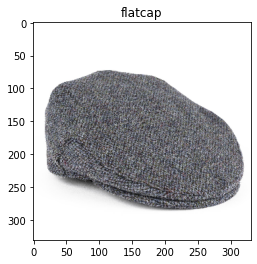

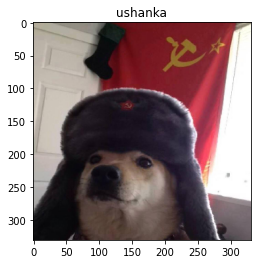

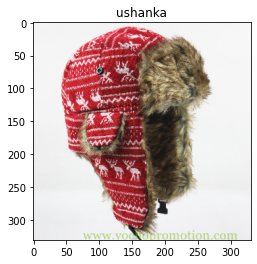

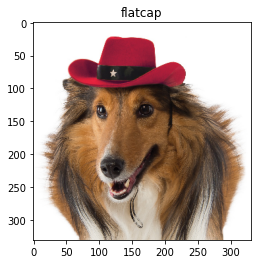

In [8]:
files = [os.path.join("examples", x) for x in os.listdir("examples")]
i = 1
for f in files:
  img = load_img(f, target_size=(331, 331))
  img_tensor = np.array([img_to_array(img)])
  img_tensor /= 255
  pred = classes[np.argmax(best_network.predict(img_tensor)[0], axis=-1)]

  plt.figure()
  plt.imshow(img)
  plt.title(pred)
  i += 1
